<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [20]</a>'.</span>

## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.03548
0:	learn: 0.9895447	total: 65.1ms	remaining: 1m 5s
1:	learn: 0.9688607	total: 68.2ms	remaining: 34s
2:	learn: 0.9484890	total: 70.8ms	remaining: 23.5s
3:	learn: 0.9313591	total: 73.9ms	remaining: 18.4s
4:	learn: 0.9142214	total: 76.4ms	remaining: 15.2s
5:	learn: 0.8963606	total: 78.6ms	remaining: 13s
6:	learn: 0.8797970	total: 81.1ms	remaining: 11.5s
7:	learn: 0.8630265	total: 83.4ms	remaining: 10.3s
8:	learn: 0.8481864	total: 85.2ms	remaining: 9.38s
9:	learn: 0.8302527	total: 87.7ms	remaining: 8.68s
10:	learn: 0.8154784	total: 90ms	remaining: 8.09s
11:	learn: 0.7996423	total: 92.8ms	remaining: 7.64s
12:	learn: 0.7834828	total: 96.7ms	remaining: 7.34s
13:	learn: 0.7689227	total: 102ms	remaining: 7.21s
14:	learn: 0.7546959	total: 111ms	remaining: 7.3s
15:	learn: 0.7406424	total: 115ms	remaining: 7.08s
16:	learn: 0.7248864	total: 118ms	remaining: 6.81s
17:	learn: 0.7128576	total: 121ms	remaining: 6.6s
18:	learn: 0.6997679	total: 127ms	remaining: 6.53s
19:	lea

36:	learn: 0.5322709	total: 175ms	remaining: 4.57s
37:	learn: 0.5247448	total: 178ms	remaining: 4.51s
38:	learn: 0.5176056	total: 180ms	remaining: 4.44s
39:	learn: 0.5099598	total: 183ms	remaining: 4.39s
40:	learn: 0.5043000	total: 187ms	remaining: 4.37s
41:	learn: 0.4981142	total: 189ms	remaining: 4.32s
42:	learn: 0.4929783	total: 194ms	remaining: 4.31s
43:	learn: 0.4878053	total: 196ms	remaining: 4.27s
44:	learn: 0.4824266	total: 199ms	remaining: 4.23s
45:	learn: 0.4761897	total: 201ms	remaining: 4.18s
46:	learn: 0.4708249	total: 204ms	remaining: 4.13s
47:	learn: 0.4648045	total: 206ms	remaining: 4.09s
48:	learn: 0.4609414	total: 209ms	remaining: 4.05s
49:	learn: 0.4564791	total: 211ms	remaining: 4.01s
50:	learn: 0.4508372	total: 214ms	remaining: 3.98s
51:	learn: 0.4464692	total: 216ms	remaining: 3.94s
52:	learn: 0.4417122	total: 219ms	remaining: 3.91s
53:	learn: 0.4370569	total: 243ms	remaining: 4.26s
54:	learn: 0.4330404	total: 246ms	remaining: 4.23s
55:	learn: 0.4282327	total: 249

84:	learn: 0.3409002	total: 362ms	remaining: 3.89s
85:	learn: 0.3389709	total: 368ms	remaining: 3.91s
86:	learn: 0.3365480	total: 374ms	remaining: 3.92s
87:	learn: 0.3342065	total: 376ms	remaining: 3.9s
88:	learn: 0.3318326	total: 389ms	remaining: 3.98s
89:	learn: 0.3296494	total: 392ms	remaining: 3.96s
90:	learn: 0.3274879	total: 394ms	remaining: 3.94s
91:	learn: 0.3252639	total: 397ms	remaining: 3.92s
92:	learn: 0.3231567	total: 401ms	remaining: 3.91s
93:	learn: 0.3219703	total: 404ms	remaining: 3.9s
94:	learn: 0.3203370	total: 411ms	remaining: 3.91s
95:	learn: 0.3191310	total: 414ms	remaining: 3.9s
96:	learn: 0.3177581	total: 416ms	remaining: 3.87s
97:	learn: 0.3161006	total: 419ms	remaining: 3.85s
98:	learn: 0.3142983	total: 421ms	remaining: 3.83s
99:	learn: 0.3122909	total: 423ms	remaining: 3.81s
100:	learn: 0.3106709	total: 426ms	remaining: 3.79s
101:	learn: 0.3090281	total: 429ms	remaining: 3.77s
102:	learn: 0.3075539	total: 431ms	remaining: 3.75s
103:	learn: 0.3063766	total: 44

123:	learn: 0.2808575	total: 512ms	remaining: 3.62s
124:	learn: 0.2798105	total: 516ms	remaining: 3.61s
125:	learn: 0.2785698	total: 518ms	remaining: 3.6s
126:	learn: 0.2774468	total: 521ms	remaining: 3.58s
127:	learn: 0.2763781	total: 524ms	remaining: 3.57s
128:	learn: 0.2751091	total: 528ms	remaining: 3.56s
129:	learn: 0.2738889	total: 531ms	remaining: 3.55s
130:	learn: 0.2727678	total: 533ms	remaining: 3.54s
131:	learn: 0.2716968	total: 536ms	remaining: 3.52s
132:	learn: 0.2706488	total: 540ms	remaining: 3.52s
133:	learn: 0.2699419	total: 542ms	remaining: 3.5s
134:	learn: 0.2691634	total: 545ms	remaining: 3.49s
135:	learn: 0.2683927	total: 547ms	remaining: 3.48s
136:	learn: 0.2675379	total: 550ms	remaining: 3.46s
137:	learn: 0.2661007	total: 553ms	remaining: 3.45s
138:	learn: 0.2647624	total: 561ms	remaining: 3.47s
139:	learn: 0.2637107	total: 567ms	remaining: 3.48s
140:	learn: 0.2626109	total: 571ms	remaining: 3.48s
141:	learn: 0.2615815	total: 576ms	remaining: 3.48s
142:	learn: 0.

158:	learn: 0.2472900	total: 638ms	remaining: 3.38s
159:	learn: 0.2464983	total: 641ms	remaining: 3.36s
160:	learn: 0.2457752	total: 644ms	remaining: 3.36s
161:	learn: 0.2451610	total: 647ms	remaining: 3.35s
162:	learn: 0.2443228	total: 649ms	remaining: 3.33s
163:	learn: 0.2435368	total: 652ms	remaining: 3.32s
164:	learn: 0.2429723	total: 655ms	remaining: 3.31s
165:	learn: 0.2422564	total: 657ms	remaining: 3.3s
166:	learn: 0.2415437	total: 662ms	remaining: 3.3s
167:	learn: 0.2407198	total: 664ms	remaining: 3.29s
168:	learn: 0.2401025	total: 670ms	remaining: 3.29s
169:	learn: 0.2391604	total: 672ms	remaining: 3.28s
170:	learn: 0.2385616	total: 675ms	remaining: 3.27s
171:	learn: 0.2377064	total: 678ms	remaining: 3.26s
172:	learn: 0.2369788	total: 681ms	remaining: 3.25s
173:	learn: 0.2360749	total: 683ms	remaining: 3.24s
174:	learn: 0.2354161	total: 685ms	remaining: 3.23s
175:	learn: 0.2349384	total: 688ms	remaining: 3.22s
176:	learn: 0.2340753	total: 691ms	remaining: 3.21s
177:	learn: 0.

187:	learn: 0.2267927	total: 768ms	remaining: 3.32s
188:	learn: 0.2259837	total: 771ms	remaining: 3.31s
189:	learn: 0.2253170	total: 773ms	remaining: 3.29s
190:	learn: 0.2246578	total: 775ms	remaining: 3.28s
191:	learn: 0.2239995	total: 778ms	remaining: 3.27s
192:	learn: 0.2232810	total: 780ms	remaining: 3.26s
193:	learn: 0.2224450	total: 782ms	remaining: 3.25s
194:	learn: 0.2220745	total: 785ms	remaining: 3.24s
195:	learn: 0.2213064	total: 787ms	remaining: 3.23s
196:	learn: 0.2207775	total: 790ms	remaining: 3.22s
197:	learn: 0.2200891	total: 793ms	remaining: 3.21s
198:	learn: 0.2197427	total: 798ms	remaining: 3.21s
199:	learn: 0.2191844	total: 803ms	remaining: 3.21s
200:	learn: 0.2185250	total: 805ms	remaining: 3.2s
201:	learn: 0.2178998	total: 808ms	remaining: 3.19s
202:	learn: 0.2173498	total: 810ms	remaining: 3.18s
203:	learn: 0.2165635	total: 813ms	remaining: 3.17s
204:	learn: 0.2158138	total: 816ms	remaining: 3.16s
205:	learn: 0.2154070	total: 819ms	remaining: 3.15s
206:	learn: 0

239:	learn: 0.1965673	total: 940ms	remaining: 2.98s
240:	learn: 0.1959014	total: 943ms	remaining: 2.97s
241:	learn: 0.1953558	total: 945ms	remaining: 2.96s
242:	learn: 0.1948487	total: 948ms	remaining: 2.95s
243:	learn: 0.1943384	total: 950ms	remaining: 2.94s
244:	learn: 0.1939583	total: 953ms	remaining: 2.94s
245:	learn: 0.1935767	total: 956ms	remaining: 2.93s
246:	learn: 0.1928246	total: 972ms	remaining: 2.96s
247:	learn: 0.1923584	total: 975ms	remaining: 2.96s
248:	learn: 0.1920115	total: 977ms	remaining: 2.95s
249:	learn: 0.1916017	total: 980ms	remaining: 2.94s
250:	learn: 0.1910694	total: 982ms	remaining: 2.93s
251:	learn: 0.1905484	total: 984ms	remaining: 2.92s
252:	learn: 0.1900238	total: 987ms	remaining: 2.91s
253:	learn: 0.1896428	total: 989ms	remaining: 2.9s
254:	learn: 0.1895092	total: 991ms	remaining: 2.9s
255:	learn: 0.1890981	total: 999ms	remaining: 2.9s
256:	learn: 0.1887903	total: 1s	remaining: 2.9s
257:	learn: 0.1881507	total: 1s	remaining: 2.89s
258:	learn: 0.1877701	

272:	learn: 0.1802847	total: 1.05s	remaining: 2.79s
273:	learn: 0.1798641	total: 1.05s	remaining: 2.78s
274:	learn: 0.1795010	total: 1.05s	remaining: 2.77s
275:	learn: 0.1790786	total: 1.05s	remaining: 2.76s
276:	learn: 0.1786699	total: 1.05s	remaining: 2.75s
277:	learn: 0.1782743	total: 1.06s	remaining: 2.75s
278:	learn: 0.1776839	total: 1.06s	remaining: 2.74s
279:	learn: 0.1772272	total: 1.06s	remaining: 2.73s
280:	learn: 0.1768270	total: 1.06s	remaining: 2.72s
281:	learn: 0.1764163	total: 1.07s	remaining: 2.72s
282:	learn: 0.1760095	total: 1.07s	remaining: 2.72s
283:	learn: 0.1756978	total: 1.08s	remaining: 2.71s
284:	learn: 0.1754930	total: 1.08s	remaining: 2.71s
285:	learn: 0.1750227	total: 1.08s	remaining: 2.7s
286:	learn: 0.1742872	total: 1.08s	remaining: 2.69s
287:	learn: 0.1739582	total: 1.09s	remaining: 2.69s
288:	learn: 0.1736237	total: 1.09s	remaining: 2.68s
289:	learn: 0.1733205	total: 1.09s	remaining: 2.67s
290:	learn: 0.1729031	total: 1.09s	remaining: 2.67s
291:	learn: 0

323:	learn: 0.1595668	total: 1.2s	remaining: 2.51s
324:	learn: 0.1592828	total: 1.2s	remaining: 2.5s
325:	learn: 0.1589961	total: 1.21s	remaining: 2.5s
326:	learn: 0.1584342	total: 1.21s	remaining: 2.49s
327:	learn: 0.1581699	total: 1.21s	remaining: 2.49s
328:	learn: 0.1578835	total: 1.22s	remaining: 2.48s
329:	learn: 0.1576462	total: 1.23s	remaining: 2.49s
330:	learn: 0.1573476	total: 1.23s	remaining: 2.49s
331:	learn: 0.1568428	total: 1.24s	remaining: 2.49s
332:	learn: 0.1562785	total: 1.24s	remaining: 2.48s
333:	learn: 0.1559924	total: 1.24s	remaining: 2.47s
334:	learn: 0.1556876	total: 1.24s	remaining: 2.47s
335:	learn: 0.1553473	total: 1.25s	remaining: 2.46s
336:	learn: 0.1550058	total: 1.25s	remaining: 2.46s
337:	learn: 0.1548511	total: 1.25s	remaining: 2.45s
338:	learn: 0.1544439	total: 1.25s	remaining: 2.44s
339:	learn: 0.1540298	total: 1.25s	remaining: 2.44s
340:	learn: 0.1538344	total: 1.26s	remaining: 2.43s
341:	learn: 0.1536046	total: 1.27s	remaining: 2.44s
342:	learn: 0.15

384:	learn: 0.1412228	total: 1.38s	remaining: 2.2s
385:	learn: 0.1410070	total: 1.38s	remaining: 2.19s
386:	learn: 0.1407022	total: 1.38s	remaining: 2.19s
387:	learn: 0.1406281	total: 1.39s	remaining: 2.18s
388:	learn: 0.1403741	total: 1.39s	remaining: 2.18s
389:	learn: 0.1401805	total: 1.39s	remaining: 2.17s
390:	learn: 0.1399991	total: 1.4s	remaining: 2.18s
391:	learn: 0.1396667	total: 1.4s	remaining: 2.17s
392:	learn: 0.1393258	total: 1.4s	remaining: 2.17s
393:	learn: 0.1390044	total: 1.41s	remaining: 2.16s
394:	learn: 0.1387838	total: 1.41s	remaining: 2.16s
395:	learn: 0.1385910	total: 1.41s	remaining: 2.15s
396:	learn: 0.1382032	total: 1.41s	remaining: 2.15s
397:	learn: 0.1379235	total: 1.42s	remaining: 2.14s
398:	learn: 0.1378341	total: 1.42s	remaining: 2.13s
399:	learn: 0.1375219	total: 1.42s	remaining: 2.13s
400:	learn: 0.1372396	total: 1.42s	remaining: 2.12s
401:	learn: 0.1370323	total: 1.42s	remaining: 2.12s
402:	learn: 0.1368437	total: 1.43s	remaining: 2.11s
403:	learn: 0.13

426:	learn: 0.1307512	total: 1.51s	remaining: 2.02s
427:	learn: 0.1303589	total: 1.51s	remaining: 2.02s
428:	learn: 0.1302457	total: 1.51s	remaining: 2.02s
429:	learn: 0.1301760	total: 1.52s	remaining: 2.01s
430:	learn: 0.1299651	total: 1.52s	remaining: 2.01s
431:	learn: 0.1297907	total: 1.52s	remaining: 2s
432:	learn: 0.1294501	total: 1.53s	remaining: 2s
433:	learn: 0.1291304	total: 1.53s	remaining: 2s
434:	learn: 0.1289656	total: 1.53s	remaining: 1.99s
435:	learn: 0.1287499	total: 1.54s	remaining: 1.99s
436:	learn: 0.1284609	total: 1.54s	remaining: 1.98s
437:	learn: 0.1283955	total: 1.54s	remaining: 1.98s
438:	learn: 0.1281146	total: 1.54s	remaining: 1.97s
439:	learn: 0.1278716	total: 1.55s	remaining: 1.97s
440:	learn: 0.1275774	total: 1.55s	remaining: 1.96s
441:	learn: 0.1273580	total: 1.55s	remaining: 1.96s
442:	learn: 0.1270821	total: 1.55s	remaining: 1.95s
443:	learn: 0.1268349	total: 1.56s	remaining: 1.95s
444:	learn: 0.1264812	total: 1.56s	remaining: 1.95s
445:	learn: 0.1264248

481:	learn: 0.1193476	total: 1.67s	remaining: 1.79s
482:	learn: 0.1191153	total: 1.67s	remaining: 1.79s
483:	learn: 0.1190012	total: 1.68s	remaining: 1.79s
484:	learn: 0.1187015	total: 1.68s	remaining: 1.79s
485:	learn: 0.1185456	total: 1.69s	remaining: 1.79s
486:	learn: 0.1183595	total: 1.69s	remaining: 1.78s
487:	learn: 0.1180794	total: 1.7s	remaining: 1.78s
488:	learn: 0.1178976	total: 1.7s	remaining: 1.77s
489:	learn: 0.1176402	total: 1.7s	remaining: 1.77s
490:	learn: 0.1173300	total: 1.7s	remaining: 1.76s
491:	learn: 0.1170936	total: 1.71s	remaining: 1.76s
492:	learn: 0.1167535	total: 1.71s	remaining: 1.76s
493:	learn: 0.1164776	total: 1.71s	remaining: 1.75s
494:	learn: 0.1162377	total: 1.71s	remaining: 1.75s
495:	learn: 0.1160521	total: 1.71s	remaining: 1.74s
496:	learn: 0.1157998	total: 1.72s	remaining: 1.74s
497:	learn: 0.1156351	total: 1.72s	remaining: 1.73s
498:	learn: 0.1154048	total: 1.72s	remaining: 1.73s
499:	learn: 0.1152510	total: 1.72s	remaining: 1.72s
500:	learn: 0.11

529:	learn: 0.1093965	total: 1.82s	remaining: 1.61s
530:	learn: 0.1092134	total: 1.82s	remaining: 1.61s
531:	learn: 0.1091028	total: 1.83s	remaining: 1.61s
532:	learn: 0.1089472	total: 1.83s	remaining: 1.6s
533:	learn: 0.1087914	total: 1.83s	remaining: 1.6s
534:	learn: 0.1085027	total: 1.83s	remaining: 1.59s
535:	learn: 0.1082653	total: 1.84s	remaining: 1.59s
536:	learn: 0.1080886	total: 1.84s	remaining: 1.58s
537:	learn: 0.1079738	total: 1.84s	remaining: 1.58s
538:	learn: 0.1079244	total: 1.84s	remaining: 1.58s
539:	learn: 0.1078820	total: 1.84s	remaining: 1.57s
540:	learn: 0.1078093	total: 1.85s	remaining: 1.57s
541:	learn: 0.1076974	total: 1.86s	remaining: 1.57s
542:	learn: 0.1075631	total: 1.86s	remaining: 1.56s
543:	learn: 0.1074269	total: 1.86s	remaining: 1.56s
544:	learn: 0.1072439	total: 1.86s	remaining: 1.56s
545:	learn: 0.1069921	total: 1.87s	remaining: 1.55s
546:	learn: 0.1068152	total: 1.87s	remaining: 1.55s
547:	learn: 0.1064953	total: 1.87s	remaining: 1.54s
548:	learn: 0.

579:	learn: 0.1005858	total: 1.98s	remaining: 1.44s
580:	learn: 0.1004822	total: 1.98s	remaining: 1.43s
581:	learn: 0.1003645	total: 1.99s	remaining: 1.43s
582:	learn: 0.1002305	total: 1.99s	remaining: 1.42s
583:	learn: 0.0999337	total: 1.99s	remaining: 1.42s
584:	learn: 0.0998333	total: 1.99s	remaining: 1.41s
585:	learn: 0.0996309	total: 2s	remaining: 1.41s
586:	learn: 0.0995272	total: 2s	remaining: 1.41s
587:	learn: 0.0992867	total: 2.01s	remaining: 1.41s
588:	learn: 0.0992473	total: 2.02s	remaining: 1.41s
589:	learn: 0.0992244	total: 2.02s	remaining: 1.4s
590:	learn: 0.0989731	total: 2.02s	remaining: 1.4s
591:	learn: 0.0989443	total: 2.02s	remaining: 1.4s
592:	learn: 0.0987016	total: 2.03s	remaining: 1.39s
593:	learn: 0.0985671	total: 2.03s	remaining: 1.39s
594:	learn: 0.0983449	total: 2.03s	remaining: 1.38s
595:	learn: 0.0980974	total: 2.03s	remaining: 1.38s
596:	learn: 0.0978353	total: 2.04s	remaining: 1.37s
597:	learn: 0.0975700	total: 2.04s	remaining: 1.37s
598:	learn: 0.0973350

627:	learn: 0.0925332	total: 2.15s	remaining: 1.27s
628:	learn: 0.0922832	total: 2.15s	remaining: 1.27s
629:	learn: 0.0921175	total: 2.15s	remaining: 1.26s
630:	learn: 0.0919123	total: 2.15s	remaining: 1.26s
631:	learn: 0.0917795	total: 2.15s	remaining: 1.25s
632:	learn: 0.0916588	total: 2.16s	remaining: 1.25s
633:	learn: 0.0913901	total: 2.16s	remaining: 1.25s
634:	learn: 0.0912608	total: 2.16s	remaining: 1.24s
635:	learn: 0.0910922	total: 2.16s	remaining: 1.24s
636:	learn: 0.0909007	total: 2.17s	remaining: 1.24s
637:	learn: 0.0908617	total: 2.17s	remaining: 1.23s
638:	learn: 0.0907311	total: 2.17s	remaining: 1.23s
639:	learn: 0.0905685	total: 2.18s	remaining: 1.22s
640:	learn: 0.0902894	total: 2.18s	remaining: 1.22s
641:	learn: 0.0901182	total: 2.19s	remaining: 1.22s
642:	learn: 0.0899645	total: 2.2s	remaining: 1.22s
643:	learn: 0.0898725	total: 2.21s	remaining: 1.22s
644:	learn: 0.0896516	total: 2.21s	remaining: 1.22s
645:	learn: 0.0895527	total: 2.21s	remaining: 1.21s
646:	learn: 0

669:	learn: 0.0860835	total: 2.28s	remaining: 1.12s
670:	learn: 0.0858896	total: 2.28s	remaining: 1.12s
671:	learn: 0.0857276	total: 2.28s	remaining: 1.11s
672:	learn: 0.0855025	total: 2.29s	remaining: 1.11s
673:	learn: 0.0853409	total: 2.29s	remaining: 1.11s
674:	learn: 0.0851552	total: 2.29s	remaining: 1.1s
675:	learn: 0.0850191	total: 2.3s	remaining: 1.1s
676:	learn: 0.0848537	total: 2.3s	remaining: 1.1s
677:	learn: 0.0846514	total: 2.3s	remaining: 1.09s
678:	learn: 0.0844853	total: 2.31s	remaining: 1.09s
679:	learn: 0.0843555	total: 2.31s	remaining: 1.08s
680:	learn: 0.0842191	total: 2.31s	remaining: 1.08s
681:	learn: 0.0839740	total: 2.31s	remaining: 1.08s
682:	learn: 0.0838248	total: 2.31s	remaining: 1.07s
683:	learn: 0.0837614	total: 2.32s	remaining: 1.07s
684:	learn: 0.0836167	total: 2.32s	remaining: 1.07s
685:	learn: 0.0834323	total: 2.32s	remaining: 1.06s
686:	learn: 0.0833110	total: 2.32s	remaining: 1.06s
687:	learn: 0.0832746	total: 2.33s	remaining: 1.05s
688:	learn: 0.0830

737:	learn: 0.0765492	total: 2.45s	remaining: 870ms
738:	learn: 0.0764303	total: 2.45s	remaining: 867ms
739:	learn: 0.0763047	total: 2.46s	remaining: 863ms
740:	learn: 0.0761869	total: 2.46s	remaining: 859ms
741:	learn: 0.0760915	total: 2.46s	remaining: 856ms
742:	learn: 0.0759777	total: 2.46s	remaining: 852ms
743:	learn: 0.0758214	total: 2.46s	remaining: 848ms
744:	learn: 0.0756366	total: 2.47s	remaining: 845ms
745:	learn: 0.0755576	total: 2.47s	remaining: 841ms
746:	learn: 0.0754074	total: 2.47s	remaining: 838ms
747:	learn: 0.0752616	total: 2.48s	remaining: 834ms
748:	learn: 0.0751856	total: 2.48s	remaining: 830ms
749:	learn: 0.0751490	total: 2.48s	remaining: 827ms
750:	learn: 0.0750974	total: 2.48s	remaining: 823ms
751:	learn: 0.0750280	total: 2.48s	remaining: 820ms
752:	learn: 0.0747915	total: 2.49s	remaining: 816ms
753:	learn: 0.0746877	total: 2.49s	remaining: 813ms
754:	learn: 0.0746037	total: 2.49s	remaining: 809ms
755:	learn: 0.0745261	total: 2.5s	remaining: 805ms
756:	learn: 0

807:	learn: 0.0689637	total: 2.63s	remaining: 624ms
808:	learn: 0.0688859	total: 2.63s	remaining: 621ms
809:	learn: 0.0687813	total: 2.63s	remaining: 617ms
810:	learn: 0.0686845	total: 2.63s	remaining: 614ms
811:	learn: 0.0686444	total: 2.64s	remaining: 611ms
812:	learn: 0.0685438	total: 2.64s	remaining: 607ms
813:	learn: 0.0683968	total: 2.64s	remaining: 604ms
814:	learn: 0.0682937	total: 2.64s	remaining: 600ms
815:	learn: 0.0681623	total: 2.65s	remaining: 597ms
816:	learn: 0.0680642	total: 2.65s	remaining: 593ms
817:	learn: 0.0678485	total: 2.65s	remaining: 590ms
818:	learn: 0.0677269	total: 2.65s	remaining: 586ms
819:	learn: 0.0676215	total: 2.65s	remaining: 583ms
820:	learn: 0.0674921	total: 2.66s	remaining: 580ms
821:	learn: 0.0673182	total: 2.66s	remaining: 576ms
822:	learn: 0.0672580	total: 2.66s	remaining: 573ms
823:	learn: 0.0671451	total: 2.67s	remaining: 569ms
824:	learn: 0.0669951	total: 2.67s	remaining: 566ms
825:	learn: 0.0669772	total: 2.67s	remaining: 563ms
826:	learn: 

868:	learn: 0.0627780	total: 2.8s	remaining: 422ms
869:	learn: 0.0626716	total: 2.8s	remaining: 419ms
870:	learn: 0.0626110	total: 2.8s	remaining: 415ms
871:	learn: 0.0625209	total: 2.81s	remaining: 412ms
872:	learn: 0.0624920	total: 2.81s	remaining: 409ms
873:	learn: 0.0624104	total: 2.81s	remaining: 406ms
874:	learn: 0.0622192	total: 2.82s	remaining: 402ms
875:	learn: 0.0621064	total: 2.82s	remaining: 399ms
876:	learn: 0.0620084	total: 2.82s	remaining: 396ms
877:	learn: 0.0618607	total: 2.83s	remaining: 393ms
878:	learn: 0.0617377	total: 2.83s	remaining: 389ms
879:	learn: 0.0616179	total: 2.83s	remaining: 386ms
880:	learn: 0.0615484	total: 2.83s	remaining: 383ms
881:	learn: 0.0614440	total: 2.83s	remaining: 379ms
882:	learn: 0.0614055	total: 2.84s	remaining: 376ms
883:	learn: 0.0613734	total: 2.84s	remaining: 373ms
884:	learn: 0.0613196	total: 2.84s	remaining: 369ms
885:	learn: 0.0612930	total: 2.84s	remaining: 366ms
886:	learn: 0.0612177	total: 2.85s	remaining: 363ms
887:	learn: 0.0

937:	learn: 0.0570749	total: 2.97s	remaining: 196ms
938:	learn: 0.0569905	total: 2.98s	remaining: 193ms
939:	learn: 0.0568868	total: 2.98s	remaining: 190ms
940:	learn: 0.0568439	total: 2.98s	remaining: 187ms
941:	learn: 0.0567815	total: 2.98s	remaining: 184ms
942:	learn: 0.0567216	total: 2.98s	remaining: 180ms
943:	learn: 0.0567034	total: 2.98s	remaining: 177ms
944:	learn: 0.0566287	total: 2.99s	remaining: 174ms
945:	learn: 0.0565974	total: 2.99s	remaining: 171ms
946:	learn: 0.0565243	total: 2.99s	remaining: 167ms
947:	learn: 0.0564519	total: 3s	remaining: 164ms
948:	learn: 0.0563841	total: 3s	remaining: 161ms
949:	learn: 0.0563132	total: 3s	remaining: 158ms
950:	learn: 0.0562287	total: 3.01s	remaining: 155ms
951:	learn: 0.0561533	total: 3.01s	remaining: 152ms
952:	learn: 0.0560644	total: 3.01s	remaining: 149ms
953:	learn: 0.0559490	total: 3.01s	remaining: 145ms
954:	learn: 0.0558727	total: 3.02s	remaining: 142ms
955:	learn: 0.0558235	total: 3.02s	remaining: 139ms
956:	learn: 0.0557759

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.19378497202160924
ABC Pre-generator MAE 0.23709752858582164


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

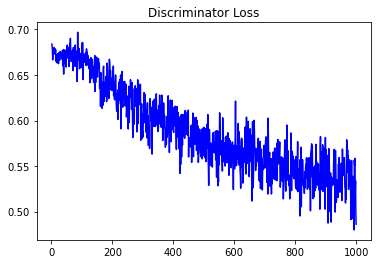

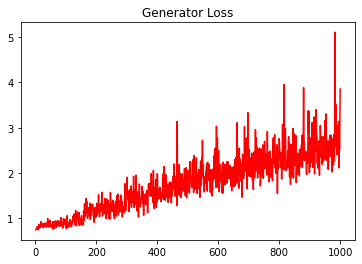

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.21299632945116245


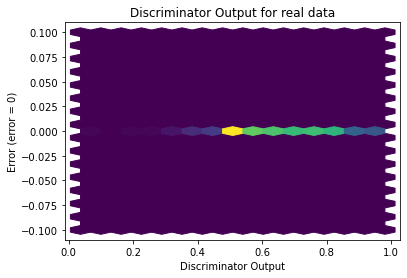

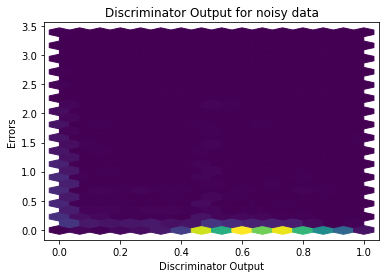

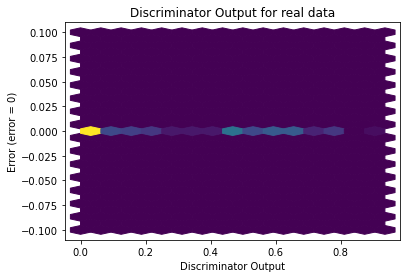

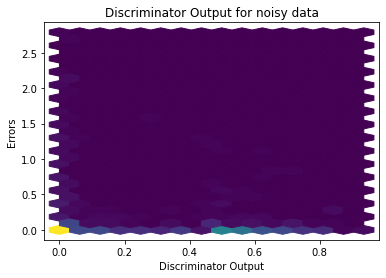

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

NameError: name 'disc3' is not defined

In [ ]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [ ]:
# #Generator
# gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc4 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


In [ ]:
# ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [ ]:
# ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

# print("MAE")
# print(mean(ABC_GAN4_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc4,device)
# sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen4.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())